First 5 rows:
           Player        DOB  Cumulative Weeks       Date   Sex  Weeks  \
0   Ilie Nastase  7/19/1946                40  8/23/1973  Male     40   
1  John Newcombe  5/23/1944                 8   6/3/1974  Male      8   
2  Jimmy Connors   9/2/1952               160  7/29/1974  Male    160   
3     Björn Borg   6/6/1956                 1  8/23/1977  Male      1   
4  Jimmy Connors   9/2/1952               244  8/30/1977  Male     84   

   Age (days)  Age (years)  (Age)/365.25  
0        9897           27     27.096509  
1       10968           30     30.028747  
2        8000           21     21.902806  
3        7748           21     21.212868  
4        9128           24     24.991102  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Player            198 non-null    object 
 1   DOB               198 non-null    obje

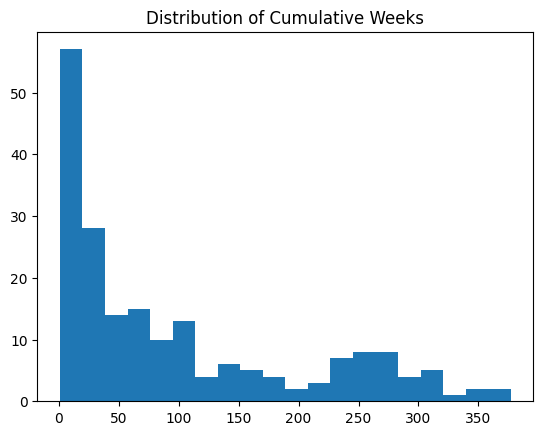

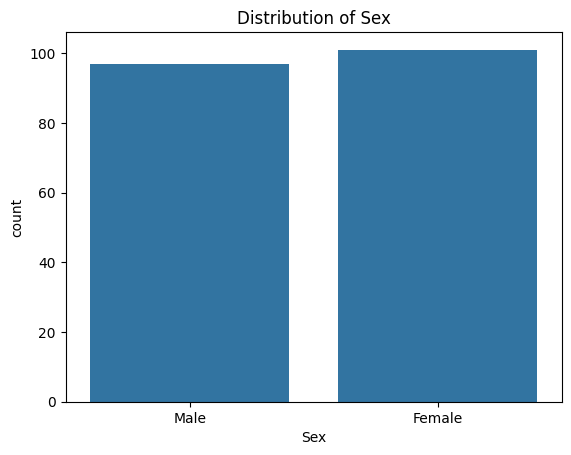


Distribution of Sex:
 Sex
Female    101
Male       97
Name: count, dtype: int64


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import AdaBoostRegressor, AdaBoostClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('/content/drive/MyDrive/Data_set/ML project/atp.csv')

# Display the first few rows
print("First 5 rows:\n", df.head())

# Get information about the dataframe
print("\nDataFrame info:\n", df.info())

# Get the unique values for Categorical Columns
categorical_features = ['Player','Sex']
for column in categorical_features:
  print(f"\nUnique values for {column}: \n {df[column].unique()}")

# Descriptive statistics
print("\nDescriptive Statistics:\n", df.describe())

# Histogram of the target variable
plt.hist(df['Cumulative Weeks'], bins = 20)
plt.title("Distribution of Cumulative Weeks")
plt.show()

# Countplot of the Sex column
sns.countplot(x="Sex",data=df)
plt.title('Distribution of Sex')
plt.show()
print("\nDistribution of Sex:\n", df['Sex'].value_counts())

Data Preprocessing

In [ ]:
#Label Encode categorical features
categorical_features = ['Player','Sex']
for column in categorical_features:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])

# Date Features
df['Date'] = pd.to_datetime(df['Date'])
df['DOB'] = pd.to_datetime(df['DOB'])
df['Date_year'] = df['Date'].dt.year
df['Date_month'] = df['Date'].dt.month
df['Date_day'] = df['Date'].dt.day
df['DOB_year'] = df['DOB'].dt.year
df['DOB_month'] = df['DOB'].dt.month
df['DOB_day'] = df['DOB'].dt.day

#Weeks ratio
df['Weeks_ratio'] = df['Cumulative Weeks'] / df['Weeks']
#Handling inf and NaN for Weeks_ratio column
df['Weeks_ratio'].replace([np.inf, -np.inf], 0, inplace=True)
df['Weeks_ratio'].fillna(0,inplace=True)

#Features and target columns
X = df.drop(columns=['Cumulative Weeks','Date','DOB','(Age)/365.25'])
y = df['Cumulative Weeks']
print("\nFeatures (X):\n", X.head())
print("\nTarget variable (y):\n", y.head())


Features (X):
    Player  Sex  Weeks  Age (days)  Age (years)  Date_year  Date_month  \
0      16    1     40        9897           27       1973           8   
1      23    1      8       10968           30       1974           6   
2      21    1    160        8000           21       1974           7   
3       7    1      1        7748           21       1977           8   
4      21    1     84        9128           24       1977           8   

   Date_day  DOB_year  DOB_month  DOB_day  Weeks_ratio  
0        23      1946          7       19     1.000000  
1         3      1944          5       23     1.000000  
2        29      1952          9        2     1.000000  
3        23      1956          6        6     1.000000  
4        30      1952          9        2     2.904762  

Target variable (y):
 0     40
1      8
2    160
3      1
4    244
Name: Cumulative Weeks, dtype: int64


<ipython-input-2-ea74bd10f1b3>:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Weeks_ratio'].replace([np.inf, -np.inf], 0, inplace=True)
<ipython-input-2-ea74bd10f1b3>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru

In [ ]:
#Splitting into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\nShape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (158, 12)
Shape of X_test: (40, 12)
Shape of y_train: (158,)
Shape of y_test: (40,)



AdaBoost Regression RMSE: 44.39498132518177
AdaBoost Regression R2: 0.8582177932898988
AdaBoost Classification Accuracy (Training Set): 0.4177215189873418
AdaBoost Classification Report (Training Set):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         4
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         1
           5       0.36      1.00      0.53         5
           6       0.00      0.00      0.00         2
           7       1.00      0.80      0.89         5
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         2
          11       1.00      0.75      0.86         4
          12       0.00      0.00      0.00         1
          13       0.00      0.00      

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Cross-Validation Scores: [ 0.84173999  0.32167872  0.55861468  0.26607623 -0.30176374]
Mean Cross-Validation Score: 0.33726917525024736

Feature Importance:
         feature  importance
11  Weeks_ratio    0.319908
2         Weeks    0.212029
3    Age (days)    0.210615
0        Player    0.092542
10      DOB_day    0.039546
5     Date_year    0.028542
8      DOB_year    0.019593
9     DOB_month    0.019131
4   Age (years)    0.016569
7      Date_day    0.014245
6    Date_month    0.013772
1           Sex    0.013509


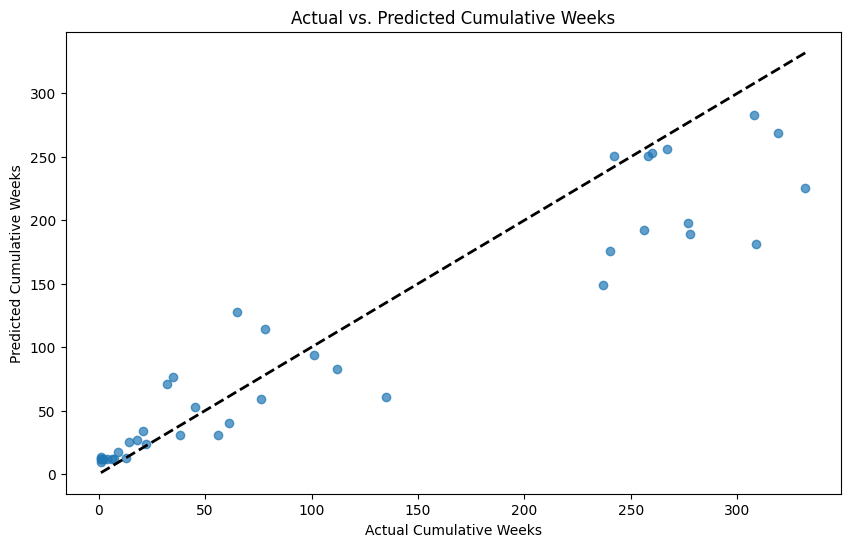

In [ ]:
#AdaBoost Regressor
ada_boost_regressor = AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=4), n_estimators=50, learning_rate=0.1, random_state=42)
ada_boost_regressor.fit(X_train, y_train)

 #AdaBoost Classifier (only for demo purposes)
#if you wanted to classify players based on their cummulative weeks, you would need to encode y values and use the classifier
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)

ada_boost_classifier = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=4), n_estimators=50, learning_rate=0.1, random_state=42)
ada_boost_classifier.fit(X_train, y_train_encoded)

 # Make predictions
y_pred_reg = ada_boost_regressor.predict(X_test)
y_pred_cls = ada_boost_classifier.predict(X_test)

 # Evaluate Regression Model
rmse = np.sqrt(mean_squared_error(y_test, y_pred_reg))
r2 = r2_score(y_test, y_pred_reg)
print(f"\nAdaBoost Regression RMSE: {rmse}")
print(f"AdaBoost Regression R2: {r2}")


#Evaluate Classification model
accuracy_cls = accuracy_score(y_train_encoded, ada_boost_classifier.predict(X_train))
print("AdaBoost Classification Accuracy (Training Set):", accuracy_cls)
print("AdaBoost Classification Report (Training Set):\n", classification_report(y_train_encoded, ada_boost_classifier.predict(X_train)))
print("\nAdaBoost Classification Confusion Matrix (Training Set):\n", confusion_matrix(y_train_encoded, ada_boost_classifier.predict(X_train)))

 #Cross-validation
scores = cross_val_score(ada_boost_regressor, X, y, cv=5)
print("Cross-Validation Scores:", scores)
print("Mean Cross-Validation Score:", scores.mean())

feature_importance = pd.DataFrame({'feature': X.columns, 'importance': ada_boost_regressor.feature_importances_})
feature_importance = feature_importance.sort_values(by='importance', ascending=False)
print("\nFeature Importance:\n", feature_importance)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_reg, alpha=0.7)
plt.xlabel("Actual Cumulative Weeks")
plt.ylabel("Predicted Cumulative Weeks")
plt.title("Actual vs. Predicted Cumulative Weeks")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

In [ ]:
scores = cross_val_score(ada_boost_regressor, X, y, cv=5)
print("Cross-Validation Scores:", scores)
print("Mean Cross-Validation Score:", scores.mean())

Cross-Validation Scores: [ 0.84173999  0.32167872  0.55861468  0.26607623 -0.30176374]
Mean Cross-Validation Score: 0.33726917525024736


In [ ]:
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': ada_boost_regressor.feature_importances_})
feature_importance = feature_importance.sort_values(by='importance', ascending=False)
print("\nFeature Importance:\n", feature_importance)


Feature Importance:
         feature  importance
11  Weeks_ratio    0.319908
2         Weeks    0.212029
3    Age (days)    0.210615
0        Player    0.092542
10      DOB_day    0.039546
5     Date_year    0.028542
8      DOB_year    0.019593
9     DOB_month    0.019131
4   Age (years)    0.016569
7      Date_day    0.014245
6    Date_month    0.013772
1           Sex    0.013509


Visualization

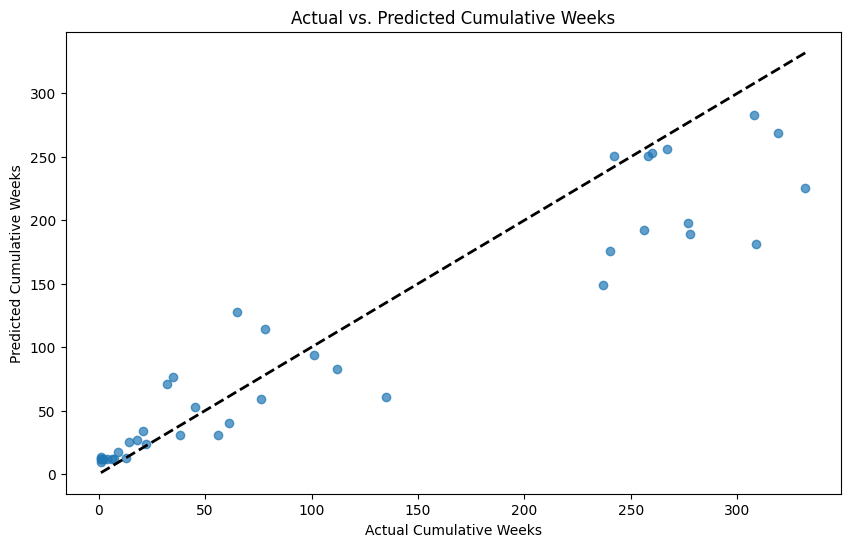

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_reg, alpha=0.7)
plt.xlabel("Actual Cumulative Weeks")
plt.ylabel("Predicted Cumulative Weeks")
plt.title("Actual vs. Predicted Cumulative Weeks")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()